$$ {\huge \text{ Disciplina: Lógica Fuzzy }}\\  \\  \large{\text{AULA 3 - Fuzzyficação e Defuzzyficação }}\\
\ \  \ \ \ \ 
\\
 { \it  \text{ Discente: Prof. Dr. João Fernando }  }
 \\
\text{ Monitor: Arnaldo Araújo} \\
\text{ Mestrado e Doutorado em Ciências da Computação - UFC }$$


In [2]:
#importar os pacotes necessários
import numpy as np
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 


# Questão 4.11 - ADAPTADA

<img src="Images/411.png">

## Pensar em um cenário otimista e pessimista????

In [3]:
anos = np.arange(0, 11.0, 0.1)
A1 = fuzz.trimf(anos,(0,2,6))
A2 = fuzz.trimf(anos,(1,6,10))

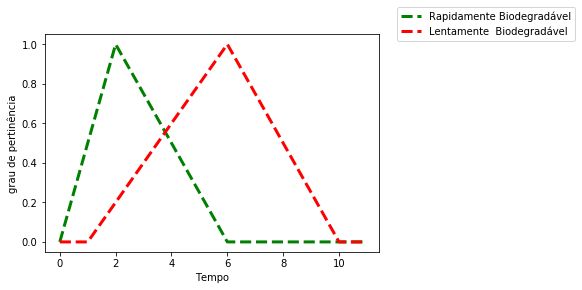

In [4]:
fig,ax = plt.subplots()
ax.plot(anos,A1,'g--',linewidth=3,label='Rapidamente Biodegradável')
ax.plot(anos,A2,'r--',linewidth=3,label='Lentamente  Biodegradável')
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Tempo')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()


In [5]:
Union1 = fuzz.fuzzy_or(anos,A1,anos,A2)


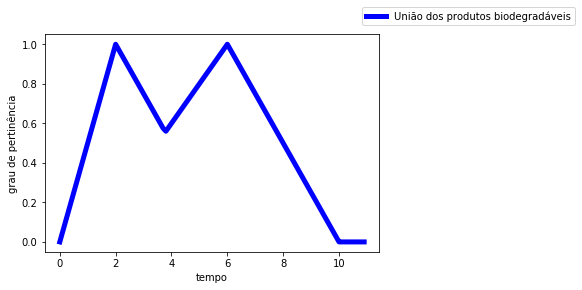

In [6]:
fig,ax = plt.subplots()
ax.plot(anos,Union1[1],'b',linewidth=5,label='União dos produtos biodegradáveis')
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('tempo')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()

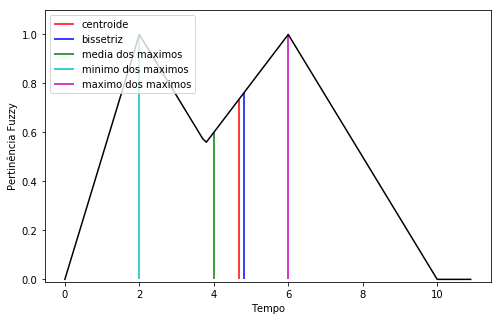

In [7]:
defuzz_centroid = fuzz.defuzz(Union1[0], Union1[1], 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(Union1[0], Union1[1], 'bisector')
defuzz_mom = fuzz.defuzz(Union1[0], Union1[1], 'mom')
defuzz_som = fuzz.defuzz(Union1[0], Union1[1], 'som')
defuzz_lom = fuzz.defuzz(Union1[0], Union1[1], 'lom')

# Collect info for vertical lines
labels = ['centroide', 'bissetriz', 'media dos maximos', 'minimo dos maximos',
          'maximo dos maximos']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(Union1[0], Union1[1], i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(anos, Union1[1], 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
    
#plt.axvline(x=3.0555)
plt.ylabel('Pertinência Fuzzy')
plt.xlabel('Tempo')
plt.ylim(-0.01, 1.1)
plt.legend(loc=2)

plt.show()



# Questão 4.13

<img src="Images/4131.png">

<img src="Images/4132.png">

In [8]:
concentracoes = np.arange(-2., 7.0, 0.1)
CSTR = fuzz.trimf(concentracoes,(-2,0,2))
PFR = fuzz.trapmf(concentracoes,(1,4,6,6))

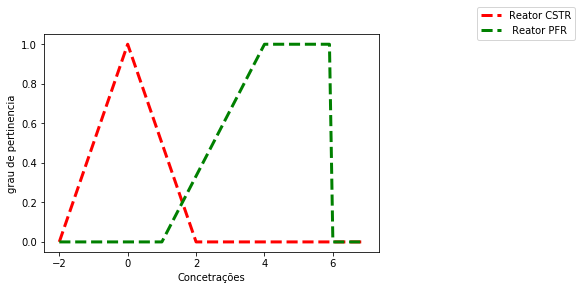

In [9]:
fig,ax = plt.subplots()
ax.plot(concentracoes,CSTR,'r--',linewidth=3,label='Reator CSTR')
ax.plot(concentracoes,PFR,'g--',linewidth=3,label=' Reator PFR')
ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Concetrações')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()


In [10]:
Union = fuzz.fuzzy_or(concentracoes,CSTR,concentracoes,PFR)

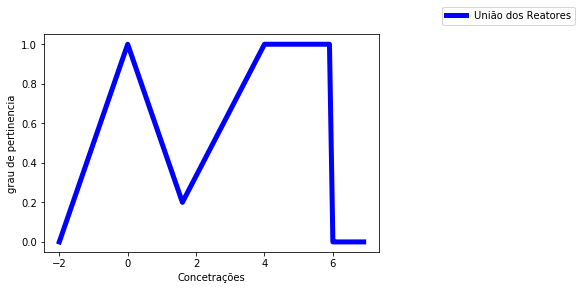

In [11]:
fig,ax = plt.subplots()
ax.plot(Union[0],Union[1],'b',linewidth=5,label='União dos Reatores')
ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Concetrações')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()

In [12]:
defuzz_centroid = fuzz.defuzz(Union[0], Union[1], 'centroid')  # Same as skfuzzy.centroid
defuzz_centroid

2.6258566978193185

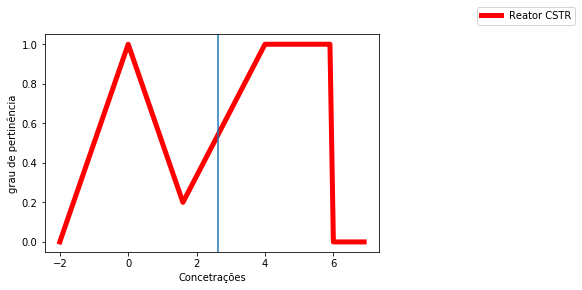

In [17]:
fig,ax = plt.subplots()
ax.plot(Union[0],Union[1],'r',linewidth=5,label='Reator CSTR')
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Concetrações')
ax.set_ylim(-0.05, 1.05);
plt.axvline(x=2.6363636)

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()

# Questão 4.14

<img src="Images/4141.png">

<img src="Images/4142.png">

In [18]:
temp = np.arange(77, 83, 0.1) #intervalo da variável temperatura
RDT = fuzz.trimf(temp,(78,79,80))
TC = fuzz.trapmf(temp,(79,80,81,82))

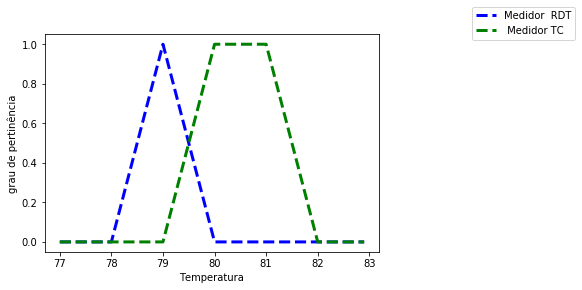

In [19]:
fig,ax = plt.subplots()
ax.plot(temp,RDT,'b--',linewidth=3,label='Medidor  RDT')
ax.plot(temp,TC,'g--',linewidth=3,label=' Medidor TC')
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Temperatura')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()


In [20]:
Union2 = fuzz.fuzzy_or(temp,RDT,temp,TC)

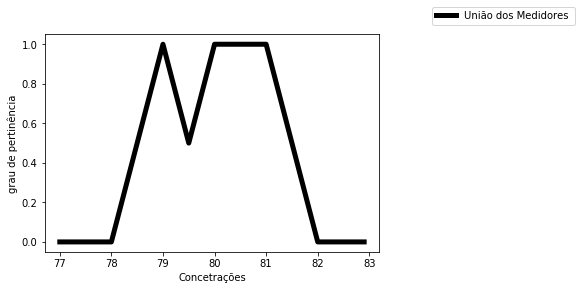

In [21]:
fig,ax = plt.subplots()
ax.plot(Union2[0],Union2[1],'black',linewidth=5,label='União dos Medidores ')
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Concetrações')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()

In [22]:
defuzz_bisector = fuzz.defuzz(Union2[0], Union2[1], 'bisector')
defuzz_bisector

80.125

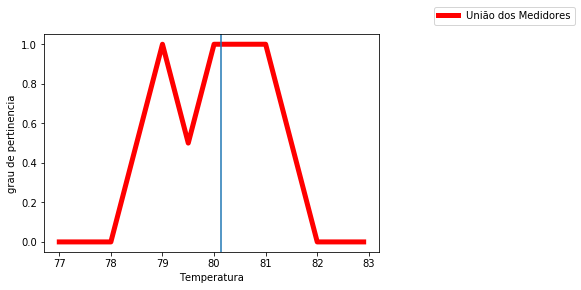

In [23]:
fig,ax = plt.subplots()
ax.plot(Union2[0],Union2[1],'r',linewidth=5,label='União dos Medidores')
ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Temperatura')
ax.set_ylim(-0.05, 1.05);
plt.axvline(x=80.125)

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()

# QUESTÃO LIVRO - FUZZY BY A DUMMY -  ESCRITO POR MIM :) 

## Avaliaçao do Risco Microbiológico.


Através de uma estudo sobre a concentração de uma bactéria específica presente no corpo humano, foi avaliado o comportamento destas de acordo com o grau de risco para o paciente . De acordo com a concentração destas no corpo humano, um grau de risco foi criado onde 1 representa o mais alto grau de risco.
As bactérias B1,B2 e B3 são descritas a seguir:

In [24]:
conc = np.arange(0, 100, 0.1) #intervalo da variável temperatura
B1 = fuzz.trapmf(conc,(0,0,30,50))
B2 = fuzz.gaussmf(conc,50,30)
B3 = fuzz.trapmf(conc,(50,70,100,100))

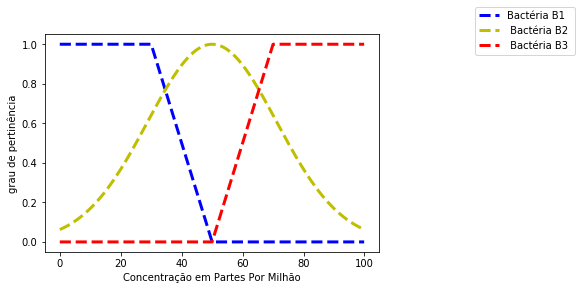

In [25]:
fig,ax = plt.subplots()
ax.plot(conc,B1,'b--',linewidth=3,label='Bactéria B1  ')
ax.plot(conc,B2,'y--',linewidth=3,label=' Bactéria B2')
ax.plot(conc,B3,'r--',linewidth=3,label=' Bactéria B3 ')

ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Concentração em Partes Por Milhão')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()


Acimas de quais valores a Bactéria B1 não apresenta riscos?

In [26]:
defuzz_lom2 = fuzz.defuzz(conc, B1, 'lom')
defuzz_lom2

30.0

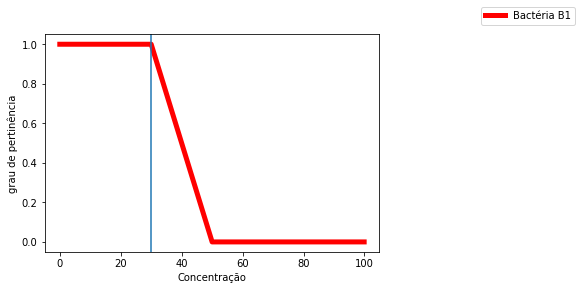

In [33]:
fig,ax = plt.subplots()
ax.plot(conc,B1,'r',linewidth=5,label='Bactéria B1')
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Concentração')
ax.set_ylim(-0.05, 1.05);
plt.axvline(defuzz_lom2)

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()

Acima de qual concentração da Bactéria B3 pode ser considerada um risco??

In [34]:
defuzz_mom2 = fuzz.defuzz(conc,B3,'som')
defuzz_mom2

70.0

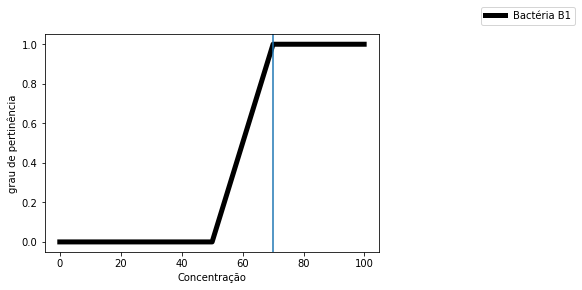

In [35]:
fig,ax = plt.subplots()
ax.plot(conc,B3,'k',linewidth=5,label='Bactéria B1')
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Concentração')
ax.set_ylim(-0.05, 1.05);
plt.axvline(defuzz_mom2)

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()

Um medicamento de alto custo foi criado capaz de distruir as bactérias do tipo B2 e B3. 
Ou seja, somente deve ser administrado em pacientes que possuem problemas com as duas bactérias. Sabendo que foi elaborado um exame capaz de indentificar a concentração qualquer uma desdas duas bactérias, qual o valor de retorno ótimo deste exame para enquadrar um paciente especificamente para este novo medicamento?

In [36]:
Union3 = fuzz.fuzzy_or(conc,B2,conc,B3)
defuzz_centroid2 = fuzz.defuzz(Union3[0],Union3[1],"centroid")


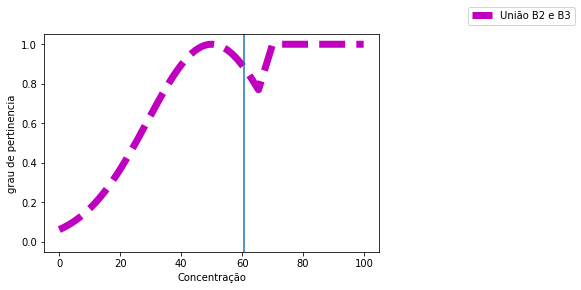

In [37]:
fig,ax = plt.subplots()
ax.plot(Union3[0],Union3[1],'m--',linewidth=7,label='União B2 e B3')
ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Concentração')
ax.set_ylim(-0.05, 1.05);
plt.axvline(defuzz_centroid2)

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()

# QUESTÃO LIVRO - FUZZY BY A DUMMY -  ESCRITO POR MIM :) 

## Mistura de uma liga metálica

$\large{\text{A concentração de um minério em uma liga metálica foi dada por 3 conjuntos fuzzy descritos a seguir:}}$


In [38]:
CC = np.arange(0, 100, 0.1) #intervalo da variável temperatura
L1 = fuzz.gaussmf(CC,25,10)
L2 = fuzz.gaussmf(CC,50,20)
L3 = fuzz.gaussmf(CC,75,25)

Considere 1 a concetração ótima para cada uma das ligas. Ou seja, valores diferente destes podem estar resultando em perda da qualidade ou desperdício de insumos. 

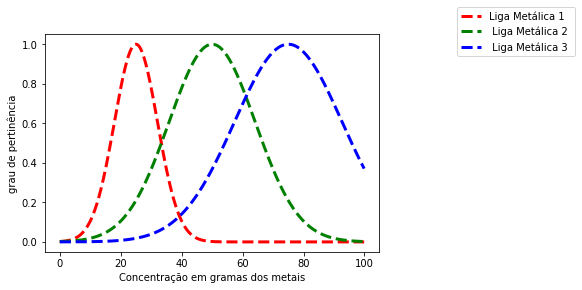

In [39]:
fig,ax = plt.subplots()
ax.plot(CC,L1,'r--',linewidth=3,label='Liga Metálica 1  ')
ax.plot(CC,L2,'g--',linewidth=3,label=' Liga Metálica 2')
ax.plot(CC,L3,'b--',linewidth=3,label=' Liga Metálica 3 ')

ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Concentração em gramas dos metais')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()


$\Large{\text{Dada uma mistura destas 3 ligas metálicas. Qual seria a concentração ótima a ser utilizada?}}$

In [40]:
Q1 = fuzz.fuzzy_or(CC,L1,CC,L2)
QFinal = fuzz.fuzzy_or(Q1[0],Q1[1],CC,L3)

In [41]:
defuCen = fuzz.defuzz(QFinal[0],QFinal[1],"centroid")
defuCen

56.137592145338864

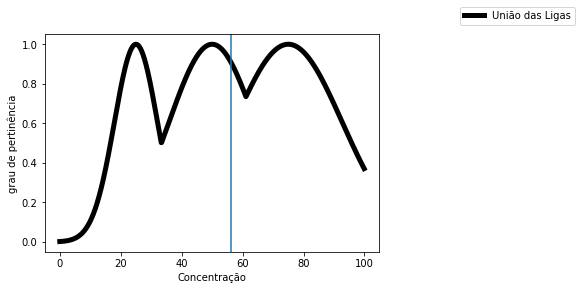

In [43]:
fig,ax = plt.subplots()
ax.plot(QFinal[0],QFinal[1],'k',linewidth=5,label='União das Ligas')
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Concentração')
ax.set_ylim(-0.05, 1.05);
plt.axvline(defuCen)

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()